# Project Title:- Laptop Price predictor

# Project Overview:
SmartTech Co. has partnered with our data science team to develop a robust machine learning model that predicts laptop prices accurately. As the market for laptops continues to expand with a myriad of brands and specifications, having a precise pricing model becomes crucial for both consumers and manufacturers.

# Project Objective:
1. Accurate Pricing
2. Market Positioning
3. Brand Influence

# Key Challenges:
1. Diverse Specifications
2. Real Time Prediction
3. Interpretability

# Steps to perform:
1.Data Exploration and Understanding  
2.Data Preprocessing  
3.Feature Engineering  
4.Model Development  
5.Hyperparameter Tuning  

Importing Libraries and Loading the data

In [1]:
#importing neccessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('laptop.csv')
df.head()

,Unnamed: 0.1,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,0.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,1.0,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,2.0,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,3.0,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,4.0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Data Cleaning

In [3]:
df.columns

Index(['Unnamed: 0.1', 'Unnamed: 0', 'Company', 'TypeName', 'Inches',
       'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight',
       'Price'],
      dtype='object')

In [4]:
df.shape

(1303, 13)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0.1      1303 non-null   int64  
 1   Unnamed: 0        1273 non-null   float64
 2   Company           1273 non-null   object 
 3   TypeName          1273 non-null   object 
 4   Inches            1273 non-null   object 
 5   ScreenResolution  1273 non-null   object 
 6   Cpu               1273 non-null   object 
 7   Ram               1273 non-null   object 
 8   Memory            1273 non-null   object 
 9   Gpu               1273 non-null   object 
 10  OpSys             1273 non-null   object 
 11  Weight            1273 non-null   object 
 12  Price             1273 non-null   float64
dtypes: float64(2), int64(1), object(10)
memory usage: 132.5+ KB


In [6]:
df.duplicated().sum()

0

In [7]:
# checking the null values
df.isnull().sum()

Unnamed: 0.1         0
Unnamed: 0          30
Company             30
TypeName            30
Inches              30
ScreenResolution    30
Cpu                 30
Ram                 30
Memory              30
Gpu                 30
OpSys               30
Weight              30
Price               30
dtype: int64

In [9]:
# droping the null values
df.dropna(inplace=True)

In [10]:
df.isnull().sum()

Unnamed: 0.1        0
Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

In [11]:
# now I'm going to drop unneccessary columns present in the dataset
df.drop(columns=['Unnamed: 0.1','Unnamed: 0'],inplace=True)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


# Feature Engineering

In [12]:
# now replacing 'GB' and 'kg' from the 'Ram' and 'Weight' column respectively
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [13]:
# converting datatypes of Ram and Weight column and also weight column has some invalid values so going to replace them
invalid_rows = df[df['Weight'] == '?']
df['Weight'] = df['Weight'].replace('?','1.6')
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float64')

In [14]:
# similarly also converting the dtype of Inches column and also it has some invalid values going to replace them as well
invalid_rows2 = df[df['Inches'] == '?']
df['Inches'] = df['Inches'].replace('?','15.6')
df['Inches'] = df['Inches'].astype('float64')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
dtypes: float64(3), int32(1), object(7)
memory usage: 114.4+ KB


In [17]:
# since the screen resolution column is not in the standardize form so we're going to deal with it and convert it into the standard one
# checking for how many different types of screen resolution is present 
df['ScreenResolution'].value_counts()

ScreenResolution
Full HD 1920x1080                                495
1366x768                                         274
IPS Panel Full HD 1920x1080                      226
IPS Panel Full HD / Touchscreen 1920x1080         52
Full HD / Touchscreen 1920x1080                   45
1600x900                                          23
Touchscreen 1366x768                              16
Quad HD+ / Touchscreen 3200x1800                  14
IPS Panel 4K Ultra HD 3840x2160                   12
IPS Panel 4K Ultra HD / Touchscreen 3840x2160     11
4K Ultra HD / Touchscreen 3840x2160                9
4K Ultra HD 3840x2160                              7
IPS Panel 1366x768                                 7
IPS Panel Retina Display 2560x1600                 6
IPS Panel Quad HD+ / Touchscreen 3200x1800         6
Touchscreen 2560x1440                              6
IPS Panel Retina Display 2304x1440                 6
Touchscreen 2256x1504                              6
IPS Panel Touchscreen 2560x14

In [18]:
# checking that the laptop is touchscreen or not
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)
df.sample(5)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen
1080,Lenovo,Ultrabook,12.5,IPS Panel Touchscreen 2560x1440,Intel Core M 6Y75 1.2GHz,8,512GB SSD,Intel HD Graphics 515,Windows 10,0.99,74538.7200,1
913,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Nvidia GeForce 930MX,Windows 10,2.04,54291.7872,0
487,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1050,Windows 10,2.06,101178.7200,0
748,Dell,Notebook,14.0,1366x768,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.60,60031.1088,0
622,Dell,Notebook,15.6,Full HD 1920x1080,Intel Core i5 8250U 1.6GHz,4,1TB HDD,AMD Radeon 530,Windows 10,2.20,41345.2800,0


<Axes: xlabel='Touchscreen'>

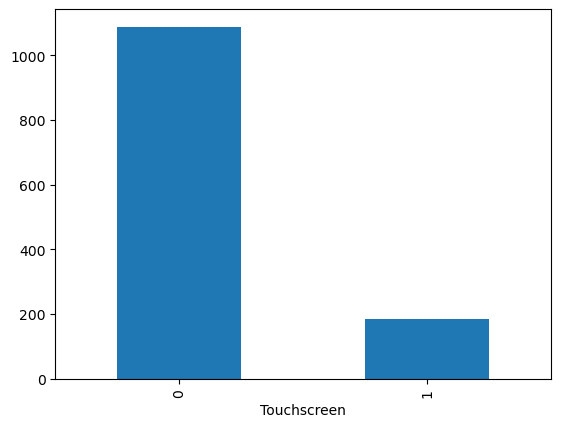

In [19]:
# checking how many touchscreen laptops are there in our dataset
df['Touchscreen'].value_counts().plot(kind='bar')

In [ ]:
# here we can see that touchscreen laptops are in less number as comapred to non-touchscreen laptops

<Axes: xlabel='Touchscreen', ylabel='Price'>

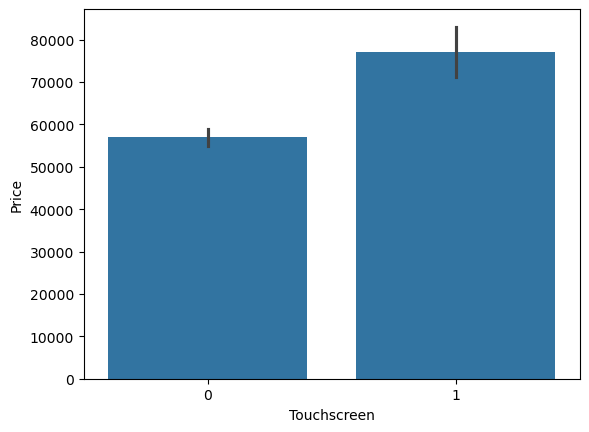

In [20]:
# checking the relationship among price and laptop with touchscreen
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [21]:
# laptops with touchscreen has more price as compared to non-touchscreen laptops

In [22]:
# creating a new column named 'Ips' to check whether the laptop has 'IPS Panel' or not
df['Ips'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1


<Axes: xlabel='Ips'>

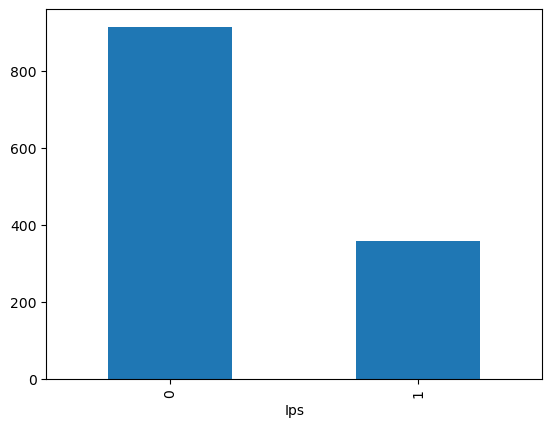

In [23]:
df['Ips'].value_counts().plot(kind='bar')

<Axes: xlabel='Ips', ylabel='Price'>

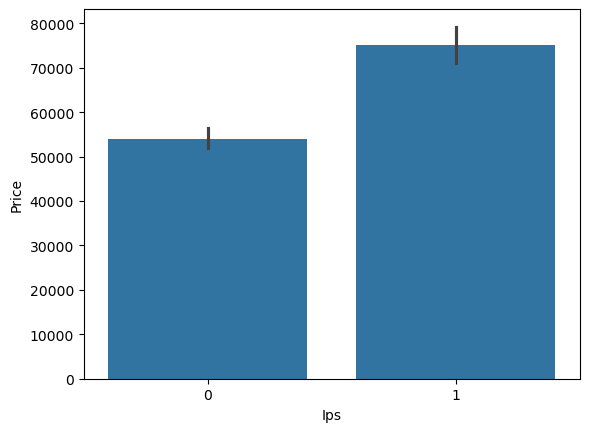

In [24]:
# checking the relationship among price and laptop with IPS Panel
sns.barplot(x=df['Ips'],y=df['Price'])

In [25]:
# from above we get that on an average the price for IPS panel laptops are more

In [26]:
# now we need to create two more columns named as 'X_res' and 'Y_res' 
df['ScreenResolution'].str.split('x',n=1,expand=True)

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [27]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)

In [28]:
df['X_res'] = new[0]
df['Y_res'] = new[1]
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,IPS Panel Retina Display 2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,Full HD 1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,IPS Panel Retina Display 2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,IPS Panel Retina Display 2560,1600


In [29]:
# here now what we need to do is using regular expression function we're going to seperate values of 'X_res' like 'Y_res'
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X_res             1273 non-null   object 
 14  Y_res             1273 non-null   object 
dtypes: float64(3), int32(1), int64(2), object(9)
memory usage: 154.2+ KB


In [31]:
# so now 'X_res' and 'Y_res' are in the form which we require now we're going to change there datatypes from 'object' to 'int'
df['X_res'] = df['X_res'].astype('int32')
df['Y_res'] = df['Y_res'].astype('int32')

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1273 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1273 non-null   object 
 1   TypeName          1273 non-null   object 
 2   Inches            1273 non-null   float64
 3   ScreenResolution  1273 non-null   object 
 4   Cpu               1273 non-null   object 
 5   Ram               1273 non-null   int32  
 6   Memory            1273 non-null   object 
 7   Gpu               1273 non-null   object 
 8   OpSys             1273 non-null   object 
 9   Weight            1273 non-null   float64
 10  Price             1273 non-null   float64
 11  Touchscreen       1273 non-null   int64  
 12  Ips               1273 non-null   int64  
 13  X_res             1273 non-null   int32  
 14  Y_res             1273 non-null   int32  
dtypes: float64(3), int32(3), int64(2), object(7)
memory usage: 144.2+ KB


In [33]:
# creating new column 'PPI' by using 'Inches', 'X_res' and 'Y_res' column
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Inches']).astype('float64')
df.head()

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [34]:
# now I'm not going to need screenresolution column further since we extracted all the required data from it so I'm going to drop it
df.drop(columns=['ScreenResolution'],inplace=True)
df.head()

,Company,TypeName,Inches,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,X_res,Y_res,PPI
0,Apple,Ultrabook,13.3,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,2560,1600,226.983005
1,Apple,Ultrabook,13.3,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,1440,900,127.677940
2,HP,Notebook,15.6,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,1920,1080,141.211998
3,Apple,Ultrabook,15.4,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,2880,1800,220.534624
4,Apple,Ultrabook,13.3,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,2560,1600,226.983005


In [35]:
# since we've PPI column so we're not going to need columns like Inches, X_res and Y_res further so I'm going to drop them as well
df.drop(columns=['Inches','X_res','Y_res'],inplace=True)
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005


In [36]:
# now moving further we focus on 'Cpu' column as it has various categories like i5,i7 etc
df['Cpu'].value_counts()

Cpu
Intel Core i5 7200U 2.5GHz     183
Intel Core i7 7700HQ 2.8GHz    142
Intel Core i7 7500U 2.7GHz     128
Intel Core i7 8550U 1.8GHz      72
Intel Core i5 8250U 1.6GHz      68
                              ... 
AMD A9-Series 9420 2.9GHz        1
Intel Core i7 2.2GHz             1
AMD A6-Series 7310 2GHz          1
Intel Atom Z8350 1.92GHz         1
AMD E-Series 9000e 1.5GHz        1
Name: count, Length: 118, dtype: int64

In [37]:
# so we can see that there are around 118 different categories of 'Cpu' present in the dataset

In [38]:
# now I'm going to create a new column Cpu Name by spliting the Cpu column values
df['Cpu Name'] = df['Cpu'].apply(lambda x:' '.join(x.split()[0:3]))
df.head()

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Name
0,Apple,Ultrabook,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


In [39]:
# now to check whether a laptop has Intel processor or any other processor I'm defining a function
def fetch_processor(text):
    if text == 'Intel Core i5' or text == 'Intel Core i7' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [40]:
# creating a different column named Cpu brand 
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)
df.sample(10)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu Name,Cpu brand
735,Lenovo,Notebook,Intel Core i7 7500U 2.7GHz,4,1TB HDD,Intel HD Graphics 620,Windows 10,1.850,41505.1200,0,0,141.211998,Intel Core i7,Intel Core i7
720,Lenovo,Ultrabook,Intel Core i7 6500U 2.5GHz,64,512GB SSD,Intel HD Graphics 520,Windows 10,1.170,89864.1792,0,1,209.800683,Intel Core i7,Intel Core i7
70,Microsoft,Ultrabook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10 S,1.252,58021.9200,1,0,200.842560,Intel Core i5,Intel Core i5
147,Asus,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,1TB HDD,Intel HD Graphics 500,Windows 10,2.000,18328.3200,0,0,141.211998,Intel Celeron Dual,Other Intel Processor
14,Apple,Ultrabook,Intel Core M m3 1.2GHz,8,256GB SSD,Intel HD Graphics 615,macOS,0.920,67260.6720,0,1,226.415547,Intel Core M,Other Intel Processor
6,Apple,Ultrabook,Intel Core i7 2.2GHz,16,256GB Flash Storage,Intel Iris Pro Graphics,Mac OS X,2.040,114017.6016,0,1,220.534624,Intel Core i7,Intel Core i7
862,Toshiba,Notebook,Intel Core i5 7200U 2.5GHz,4,128GB SSD,Intel HD Graphics 620,Windows 10,1.050,68464.8000,0,0,165.632118,Intel Core i5,Intel Core i5
480,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,512GB SSD,Nvidia GeForce 940MX,Windows 10,2.160,67239.3600,0,1,141.211998,Intel Core i7,Intel Core i7
21,Lenovo,Gaming,Intel Core i5 7300HQ 2.5GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050,Windows 10,2.500,53226.7200,0,1,141.211998,Intel Core i5,Intel Core i5
288,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.500,62817.1200,0,1,141.211998,Intel Core i7,Intel Core i7


<Axes: xlabel='Cpu brand'>

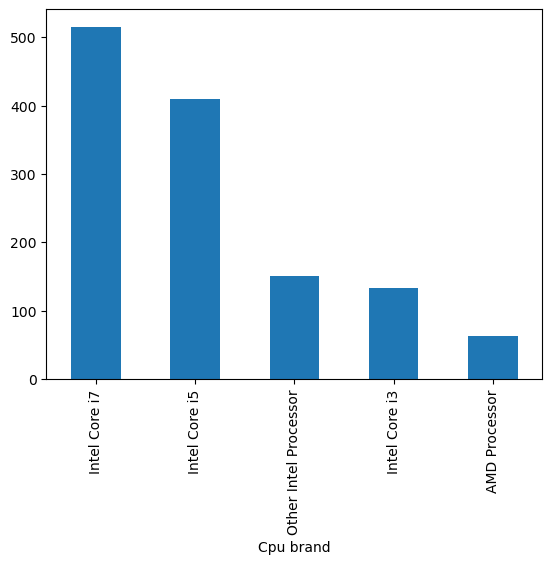

In [41]:
df['Cpu brand'].value_counts().plot(kind='bar')

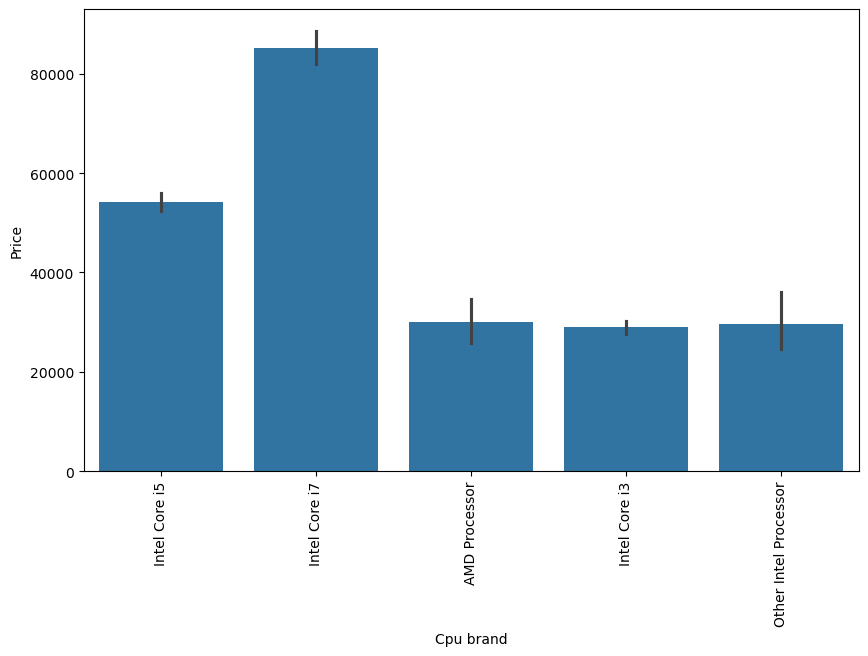

In [42]:
# price variation as per Cpu brand
plt.figure(figsize=(10,6))
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
# going to drop Cpu and Cpu Name column since Cpu brand column serves purpose of both these two columns
df.drop(columns=['Cpu','Cpu Name'],inplace=True)
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5


<Axes: xlabel='Ram'>

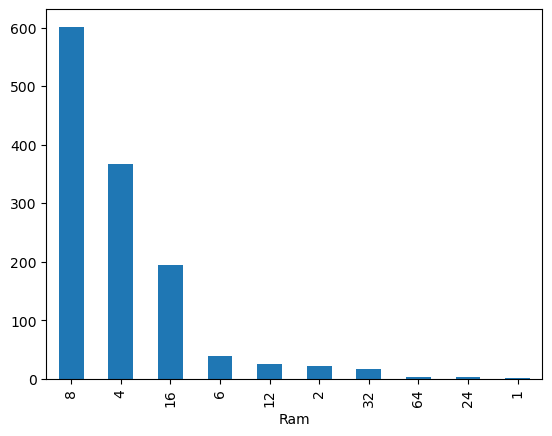

In [44]:
# dealing with Ram to see how Price depends upon it
df['Ram'].value_counts().plot(kind='bar')

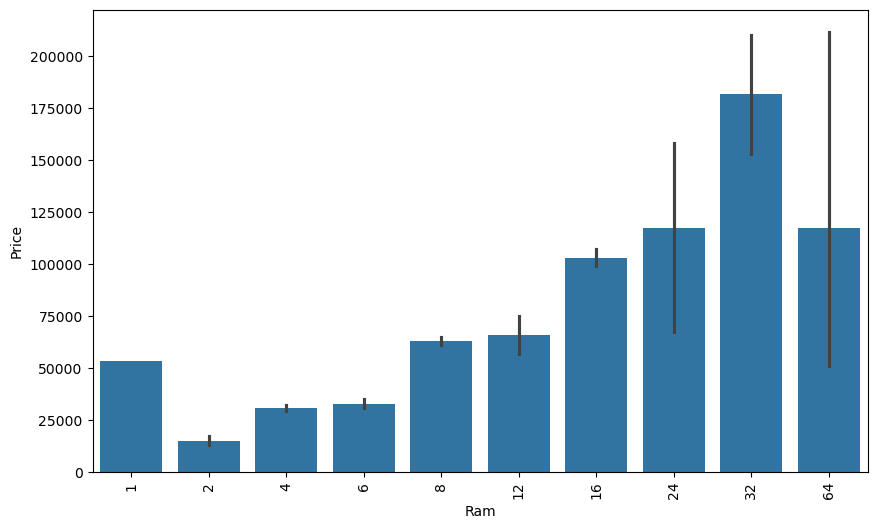

In [45]:
plt.figure(figsize=(10,6))
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [46]:
# from memory column we can see that there are different kinds of memory are there like 'SSD','HDD', etc
df['Memory'].value_counts()

Memory
256GB SSD                        401
1TB HDD                          217
500GB HDD                        130
512GB SSD                        116
128GB SSD +  1TB HDD              92
128GB SSD                         74
256GB SSD +  1TB HDD              71
32GB Flash Storage                37
2TB HDD                           16
64GB Flash Storage                14
512GB SSD +  1TB HDD              14
1TB SSD                           13
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          4
128GB Flash Storage                4
512GB SSD +  2TB HDD               3
16GB SSD                           3
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
128GB SSD +  2TB HDD               2
256GB SSD +  500GB HDD             2
256GB SSD +  256GB SSD             2
512GB SSD +  256GB SSD         

In [47]:
df['Memory'] = df['Memory'].astype(str).replace('\.0','',regex=True)
df['Memory'] = df['Memory'].astype(str).replace('GB','',regex=False)
df['Memory'] = df['Memory'].astype(str).replace('TB','000',regex=False)

# spliting the memory column in two parts(before and after '+')
new = df['Memory'].str.split('+', n=1, expand=True)

# cleaning the first part
df['first'] = new[0].str.strip()

# cleaning the second part, if present
df['second'] = new[1].fillna('0').str.strip()

# creating layers for different types of storage
# creatig layer 1
df['Layer1HDD'] = df['first'].apply(lambda a: 1 if 'HDD' in a else 0)
df['Layer1SSD'] = df['first'].apply(lambda a: 1 if 'SSD' in a else 0)
df['Layer1Flash_Storage'] = df['first'].apply(lambda a: 1 if 'Flash Storage' in a else 0)
df['Layer1Hybrid'] = df['first'].apply(lambda a: 1 if 'Hybrid' in a else 0)
df['first'] = df['first'].str.replace(r'\D', '', regex=True)

# creating layer 2
df['Layer2HDD'] = df['second'].apply(lambda a: 1 if 'HDD' in a else 0)
df['Layer2SSD'] = df['second'].apply(lambda a: 1 if 'SSD' in a else 0)
df['Layer2Flash_Storage'] = df['second'].apply(lambda a: 1 if 'Flash Storage' in a else 0)
df['Layer2Hybrid'] = df['second'].apply(lambda a: 1 if 'Hybrid' in a else 0)
df['second'] = df['second'].str.replace(r'\D', '', regex=True)

# replacing empty strings with zeroes before converting to integers
df['first'] = df['first'].replace('', '0')
df['second'] = df['second'].replace('', '0')

# converting to integers
df['first'] = df['first'].astype(int)
df['second'] = df['second'].astype(int)

# calculating the actual storage capacities
df['HDD'] = (df['first'] * df['Layer1HDD'] + df['second'] * df['Layer2HDD'])
df['SSD'] = (df['first'] * df['Layer1SSD'] + df['second'] * df['Layer2SSD'])
df['Flash_Storage'] = (df['first'] * df['Layer1Flash_Storage'] + df['second'] * df['Layer2Flash_Storage'])
df['Hybrid'] = (df['first'] * df['Layer1Hybrid'] + df['second'] * df['Layer2Hybrid'])

# droping the unneccessary columns and creating new columns
df.drop(columns=['first','second','Layer1HDD','Layer1SSD','Layer1Flash_Storage','Layer1Hybrid',
                 'Layer2HDD','Layer2SSD','Layer2Flash_Storage','Layer2Hybrid'],inplace=True)

In [48]:
df.head()

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [49]:
df.drop(columns=['Memory'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Flash_Storage,Hybrid
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,128,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,0,0


In [50]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256


In [51]:
# dealing with Gpu(Graphical processing unit) column now as we can see there are different kinds of Gpu present in the dataset
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      271
Intel HD Graphics 520      181
Intel UHD Graphics 620      66
Nvidia GeForce GTX 1050     64
Nvidia GeForce GTX 1060     48
                          ... 
AMD Radeon R5 520            1
AMD Radeon R7                1
Intel HD Graphics 540        1
AMD Radeon 540               1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [52]:
# we can see that around 110 different kinds of Gpu are present in the dataset

In [53]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])
df.head()

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [54]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
ARM         1
Name: count, dtype: int64

In [55]:
# we're going to drop this 'ARM' row
df = df[df['Gpu brand'] != 'ARM']

In [56]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     703
Nvidia    393
AMD       176
Name: count, dtype: int64

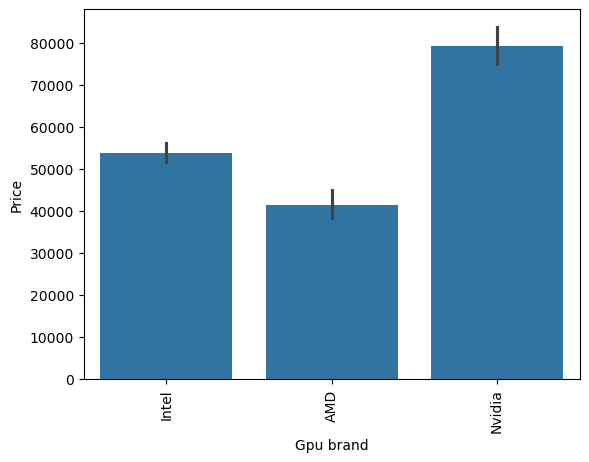

In [57]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [58]:
# now going to drop Gpu column since we've extracted values which we require
df.drop(columns=['Gpu'],inplace=True)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel


In [59]:
# now dealing with Operating System column
df['OpSys'].value_counts()

OpSys
Windows 10      1047
No OS             63
Linux             61
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            1
Name: count, dtype: int64

In [60]:
# since categories are more so I'm going to create categories like 'Windows','Mac' and 'Others'
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [61]:
# creating new column named as 'os'
df['os'] = df['OpSys'].apply(cat_os)
df.head()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,macOS,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,macOS,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,No OS,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,macOS,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,macOS,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [62]:
# going to drop 'OpSys' column
df.drop(columns=['OpSys'],inplace=True)
df.head()

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


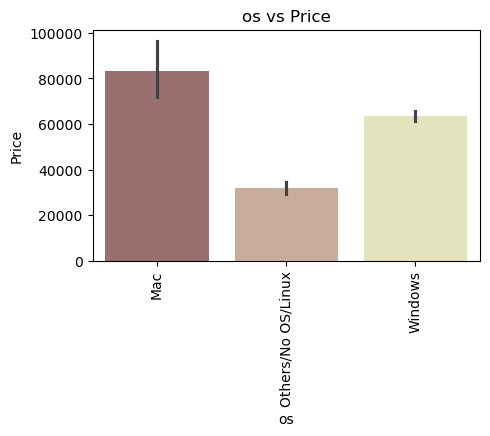

In [63]:
plt.figure(figsize=(5,3))
sns.barplot(x=df['os'],y=df['Price'],palette='pink')
plt.xticks(rotation='vertical')
plt.title('os vs Price')
plt.show()

<Axes: xlabel='Weight', ylabel='Price'>

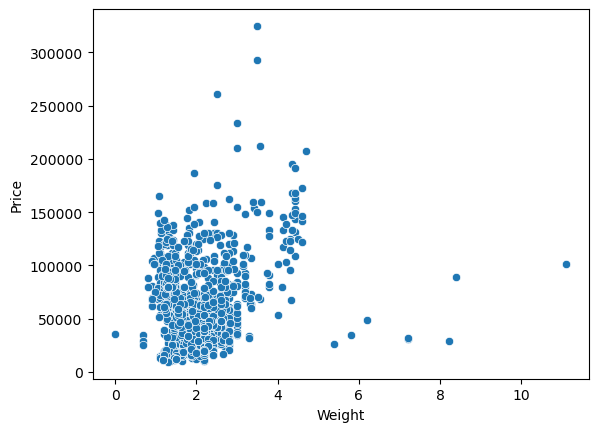

In [64]:
# variation of price with respect to weight of the laptop
sns.scatterplot(x=df['Weight'],y=df['Price'])

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Ram          1272 non-null   int32  
 3   Weight       1272 non-null   float64
 4   Price        1272 non-null   float64
 5   Touchscreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   PPI          1272 non-null   float64
 8   Cpu brand    1272 non-null   object 
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu brand    1272 non-null   object 
 12  os           1272 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 134.2+ KB


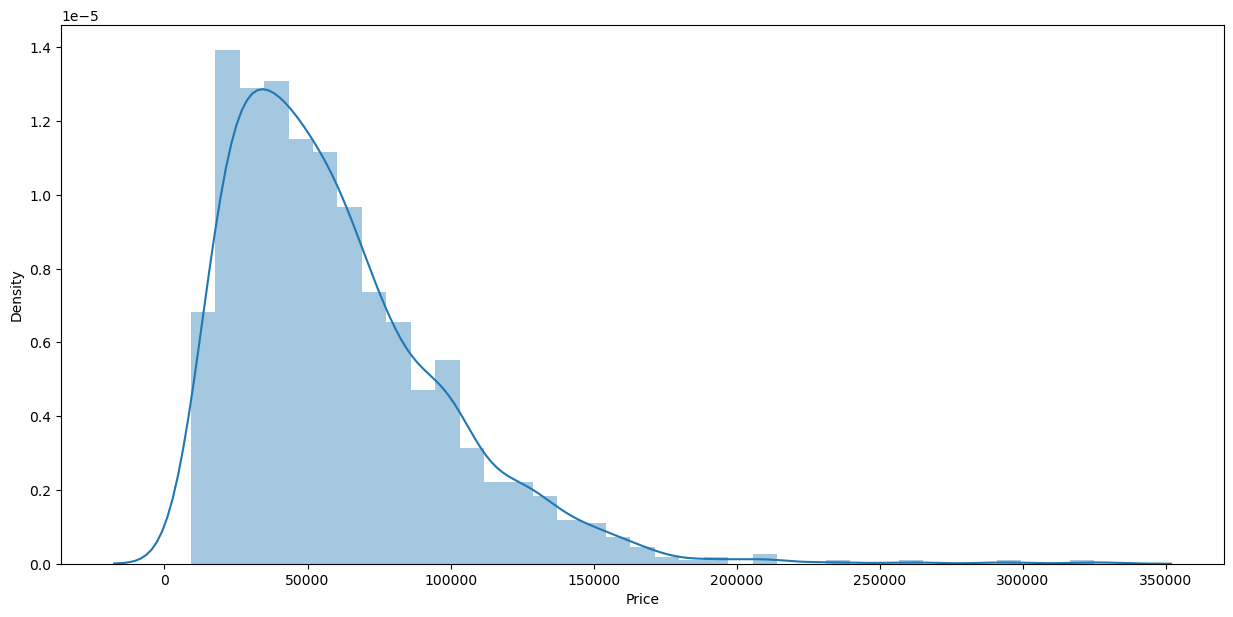

In [67]:
# Price analysis
plt.figure(figsize=(15,7))
sns.distplot(df['Price'])
plt.show()

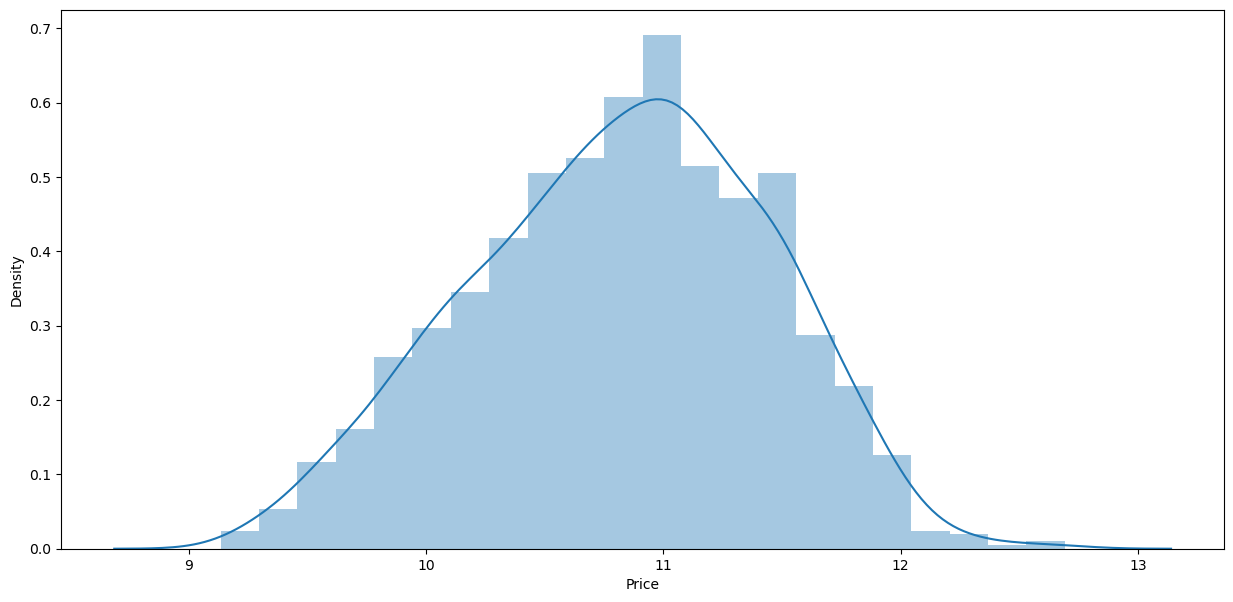

In [69]:
plt.figure(figsize=(15,7))
sns.distplot(np.log(df['Price']))
plt.show()

# Correlation Matrix
 ~using heatmap

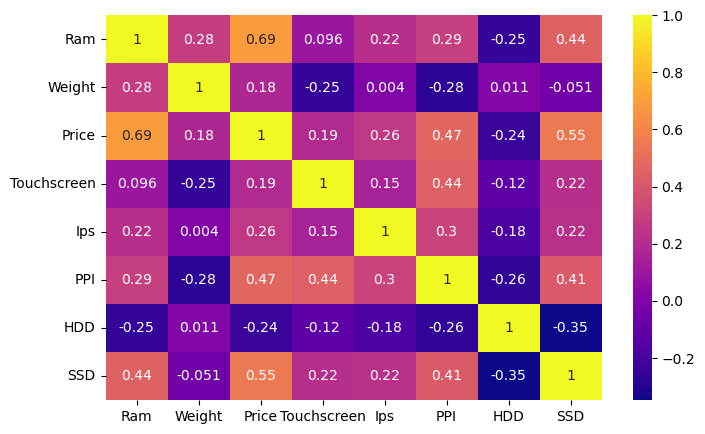

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Generate the correlation matrix heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='plasma')
plt.show()

# Model Development
  Splitting the training data and testing data

In [76]:
test = np.log(df['Price'])
train = df.drop(['Price'],axis = 1)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn import metrics
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn import tree

In [78]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1081, 12), (191, 12))

There's a Class which we imported named as Column Trasnformer we use this widely while building our models using Pipelines,so for this we have to get the index numbers of the columns which are having categorical variables

Creating a heatmap

In [79]:
mapper = {i:value for i,value in enumerate(X_train.columns)}
mapper

{0: 'Company',
 1: 'TypeName',
 2: 'Ram',
 3: 'Weight',
 4: 'Touchscreen',
 5: 'Ips',
 6: 'PPI',
 7: 'Cpu brand',
 8: 'HDD',
 9: 'SSD',
 10: 'Gpu brand',
 11: 'os'}

# Linear Regression

In [ ]:
# We will apply one hot encoding on the columns with this indices-->[0,1,7,10,11] 
 #the remainder we keep as passthrough i.e no other col must get effected except the ones undergoing the transformation!

In [82]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = LinearRegression()

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.6547027587537766
MAE 0.23293135386205144


# Decision Tree

In [83]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = DecisionTreeRegressor(max_depth=8)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.7431773078167786
MAE 0.2190422199581293


# Random Forest

In [85]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf',OneHotEncoder(sparse_output=False,drop='first'),[0,1,7,10,11])
],remainder='passthrough')

step2 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

pipe = Pipeline([
    ('step1',step1),
    ('step2',step2)
])

pipe.fit(X_train,y_train)

y_pred = pipe.predict(X_test)

print('R2 score',metrics.r2_score(y_test,y_pred))
print('MAE',metrics.mean_absolute_error(y_test,y_pred))

R2 score 0.8251517739079963
MAE 0.18217677626852977


# Pickling the ML pipeline and the data

In [86]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [87]:
train.head()

,Company,TypeName,Ram,Weight,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac


In [88]:
train.to_csv('traineddata.csv',index=None)

# Hyperparameter Tuning for Random Forest

In [89]:
indexlist = [0,1,7,10,11]
transformlist = []
for key,value in mapper.items():
    if key in indexlist:
        transformlist.append(value)
        
transformlist

['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'os']

In [90]:
train = pd.get_dummies(train,columns=transformlist,drop_first=True)
train.head()

,Ram,Weight,Touchscreen,Ips,PPI,HDD,SSD,Company_Apple,Company_Asus,Company_Chuwi,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,os_Others/No OS/Linux,os_Windows
0,8,1.37,0,1,226.983005,0,128,True,False,False,...,True,False,False,True,False,False,True,False,False,False
1,8,1.34,0,0,127.677940,0,0,True,False,False,...,True,False,False,True,False,False,True,False,False,False
2,8,1.86,0,0,141.211998,0,256,False,False,False,...,False,False,False,True,False,False,True,False,True,False
3,16,1.83,0,1,220.534624,0,512,True,False,False,...,True,False,False,False,True,False,False,False,False,False
4,8,1.37,0,1,226.983005,0,256,True,False,False,...,True,False,False,True,False,False,True,False,False,False


In [91]:
X_train, X_test, y_train, y_test = train_test_split(train,test,
                                                   test_size=0.15,random_state=2)

X_train.shape,X_test.shape

((1081, 38), (191, 38))

[Text(0.5032034712036982, 0.9791666666666666, 'Ram <= 7.0\nsquared_error = 0.398\nsamples = 1081\nvalue = 10.818'),
 Text(0.23441481832903724, 0.9375, 'Cpu brand_Other Intel Processor <= 0.5\nsquared_error = 0.187\nsamples = 370\nvalue = 10.199'),
 Text(0.15081809993472148, 0.8958333333333334, 'Cpu brand_Intel Core i5 <= 0.5\nsquared_error = 0.124\nsamples = 260\nvalue = 10.37'),
 Text(0.09958609860404392, 0.8541666666666666, 'Cpu brand_Intel Core i7 <= 0.5\nsquared_error = 0.088\nsamples = 155\nvalue = 10.226'),
 Text(0.047056503581949655, 0.8125, 'Weight <= 1.645\nsquared_error = 0.072\nsamples = 136\nvalue = 10.17'),
 Text(0.007498660953401178, 0.7708333333333334, 'TypeName_Ultrabook <= 0.5\nsquared_error = 0.059\nsamples = 9\nvalue = 10.628'),
 Text(0.005356186395286556, 0.7291666666666666, 'Weight <= 1.37\nsquared_error = 0.018\nsamples = 7\nvalue = 10.515'),
 Text(0.004284949116229245, 0.6875, 'squared_error = 0.0\nsamples = 1\nvalue = 10.208'),
 Text(0.006427423674343867, 0.6875

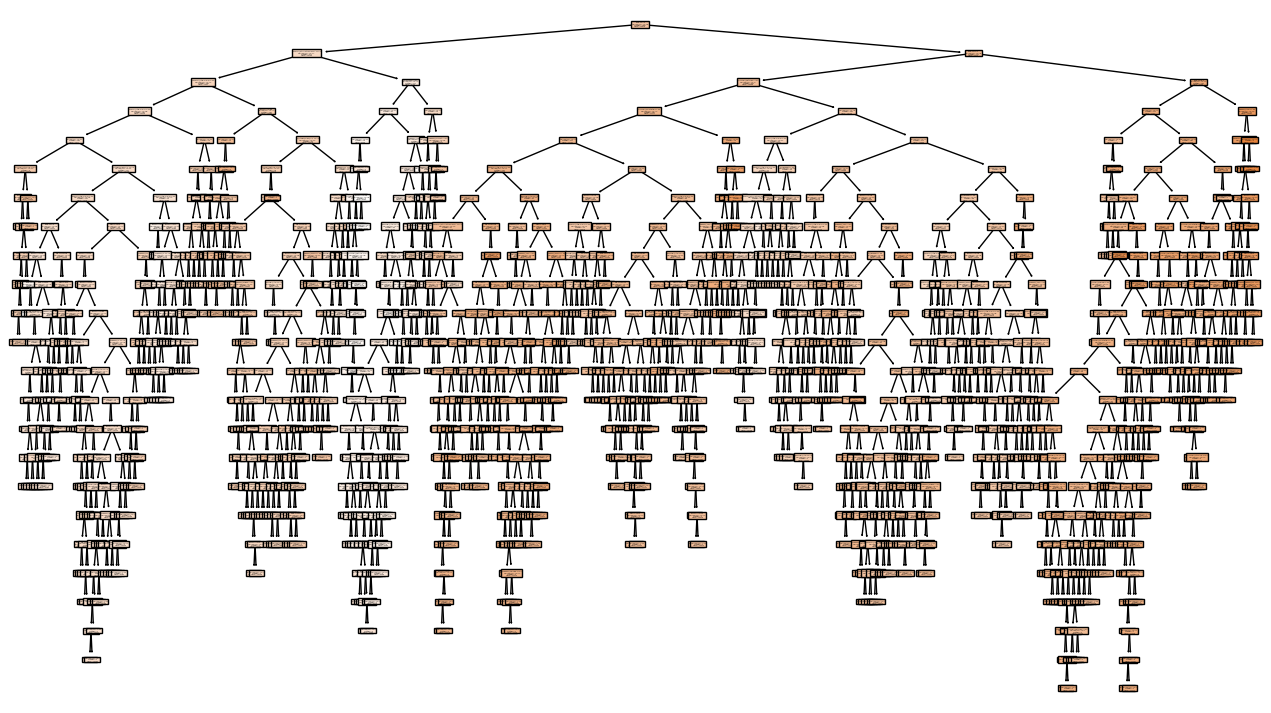

In [92]:
reg = DecisionTreeRegressor(random_state=0)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [93]:
path = reg.cost_complexity_pruning_path(X_train,y_train)
ccp_alphas = path.ccp_alphas

In [94]:
alphalist = []
for alpha in ccp_alphas:
    reg = DecisionTreeRegressor(random_state=0,ccp_alpha=alpha)
    reg.fit(X_train,y_train)
    alphalist.append(reg)

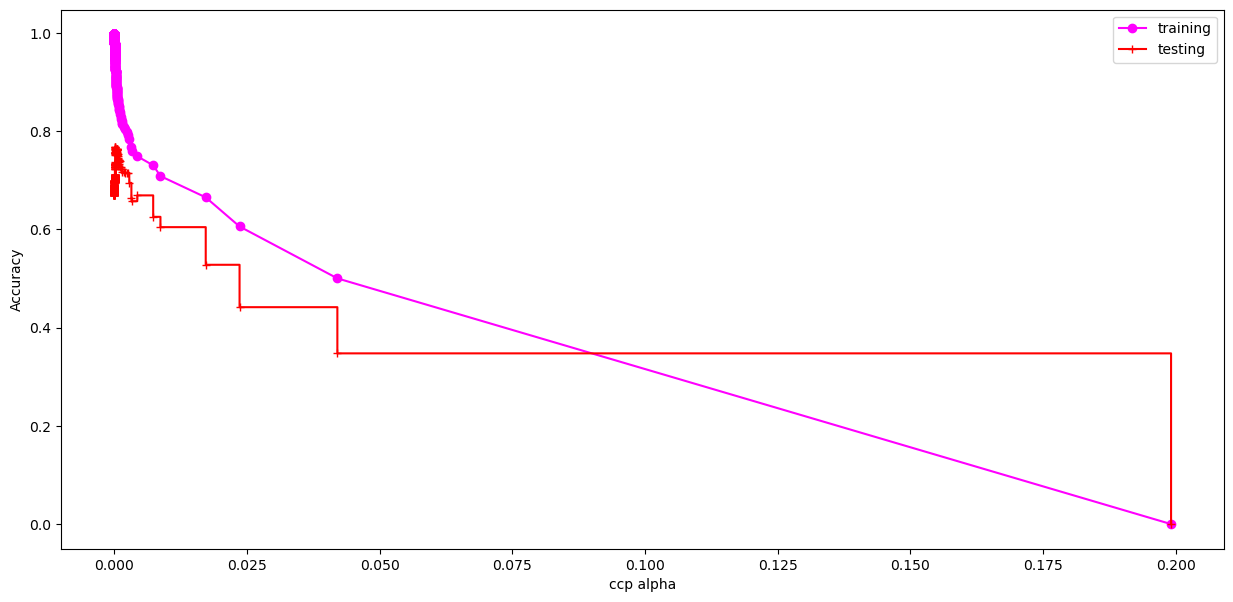

In [95]:
train_score = [reg.score(X_train,y_train) for reg in alphalist]
test_score = [reg.score(X_test,y_test) for reg in alphalist]

plt.figure(figsize=(15,7))
plt.xlabel('ccp alpha')
plt.ylabel('Accuracy')

plt.plot(ccp_alphas,train_score,marker = 'o',
        label = 'training',color = 'magenta')
plt.plot(ccp_alphas,test_score,marker = '+',
         label = 'testing',color = 'red',drawstyle = 'steps-post')
plt.legend()
plt.show()

[Text(0.5, 0.9, 'Ram <= 7.0\nsquared_error = 0.398\nsamples = 1081\nvalue = 10.818'),
 Text(0.25, 0.7, 'Cpu brand_Other Intel Processor <= 0.5\nsquared_error = 0.187\nsamples = 370\nvalue = 10.199'),
 Text(0.125, 0.5, 'squared_error = 0.124\nsamples = 260\nvalue = 10.37'),
 Text(0.375, 0.5, 'squared_error = 0.102\nsamples = 110\nvalue = 9.796'),
 Text(0.75, 0.7, 'Ram <= 14.0\nsquared_error = 0.205\nsamples = 711\nvalue = 11.14'),
 Text(0.625, 0.5, 'TypeName_Notebook <= 0.5\nsquared_error = 0.15\nsamples = 522\nvalue = 10.988'),
 Text(0.5, 0.3, 'squared_error = 0.103\nsamples = 260\nvalue = 11.177'),
 Text(0.75, 0.3, 'PPI <= 109.024\nsquared_error = 0.125\nsamples = 262\nvalue = 10.799'),
 Text(0.625, 0.1, 'squared_error = 0.072\nsamples = 47\nvalue = 10.394'),
 Text(0.875, 0.1, 'squared_error = 0.092\nsamples = 215\nvalue = 10.888'),
 Text(0.875, 0.5, 'squared_error = 0.119\nsamples = 189\nvalue = 11.56')]

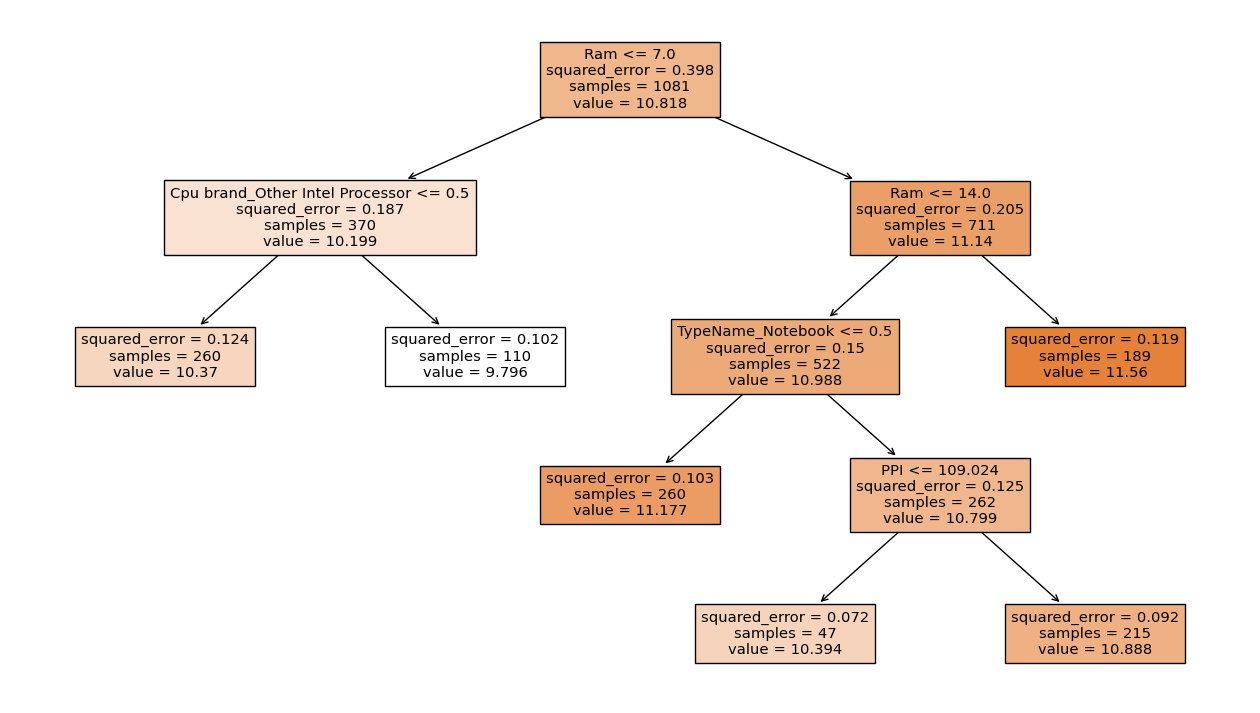

In [96]:
reg = DecisionTreeRegressor(random_state=0,ccp_alpha=0.0085)
reg.fit(X_train,y_train)
plt.figure(figsize=(16,9))
tree.plot_tree(reg,filled=True,feature_names=train.columns)

In [97]:
params=  {
    
    'RandomForest':{
        'model' : RandomForestRegressor(),
        'params':{
            'n_estimators':[int(x) for x in np.linspace(100,1200,10)],
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    },
    'Decision Tree':{
        'model':DecisionTreeRegressor(),
        'params':{
            'criterion':["mse", "mae"],
            'max_depth':[int(x) for x in np.linspace(1,30,5)],
            'max_features':['auto','sqrt','log2'],
            'ccp_alpha':[x for x in np.linspace(0.0025,0.0125,5)],
            'min_samples_split':[2,5,10,14],
            'min_samples_leaf':[2,5,10,14],
        }
    }
}

In [99]:
scores_df = pd.DataFrame(scores,columns=['model_name','best_score','best_estimator'])
scores_df

,model_name,best_score,best_estimator


In [100]:
scores

[]

In [101]:
rf = RandomForestRegressor(ccp_alpha=0.0025, max_depth=22, min_samples_leaf=14,
                        min_samples_split=5, n_estimators=1200)

rf.fit(X_train,y_train)
ypred = rf.predict(X_test)
print(metrics.r2_score(y_test,y_pred))

0.8251517739079963


# Predicting on the whole dataset

In [102]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf.predict([testtrain[i]]))
    
predicted

[array([11.23442096]),
 array([11.09444098]),
 array([10.86878237]),
 array([11.556104]),
 array([11.25140388]),
 array([10.20257252]),
 array([11.55442546]),
 array([11.09444098]),
 array([11.51725531]),
 array([11.10142796]),
 array([10.46672661]),
 array([10.17045353]),
 array([11.556104]),
 array([10.21220744]),
 array([11.25460545]),
 array([11.25140388]),
 array([10.88477441]),
 array([11.556104]),
 array([10.68988298]),
 array([11.18496254]),
 array([11.04478634]),
 array([10.16168941]),
 array([11.10078063]),
 array([11.1499762]),
 array([10.20353297]),
 array([11.09444098]),
 array([10.87479541]),
 array([11.14613559]),
 array([10.73491651]),
 array([9.78906319]),
 array([10.25190221]),
 array([10.21062807]),
 array([11.55221447]),
 array([11.09444098]),
 array([9.78906319]),
 array([10.16316451]),
 array([10.88740449]),
 array([10.51046743]),
 array([10.88413704]),
 array([10.17096817]),
 array([11.48080094]),
 array([10.42615373]),
 array([10.50921592]),
 array([11.02575005]

In [103]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [104]:
df['Predicted Price'] = np.array(ans)
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os,Predicted Price
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,75691.485446
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,65804.333857
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,52511.232277
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,104412.429259
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,76987.925876
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,30296.090204
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,104335.300069
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,17424.940067
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1,0,AMD,Windows,29207.774237


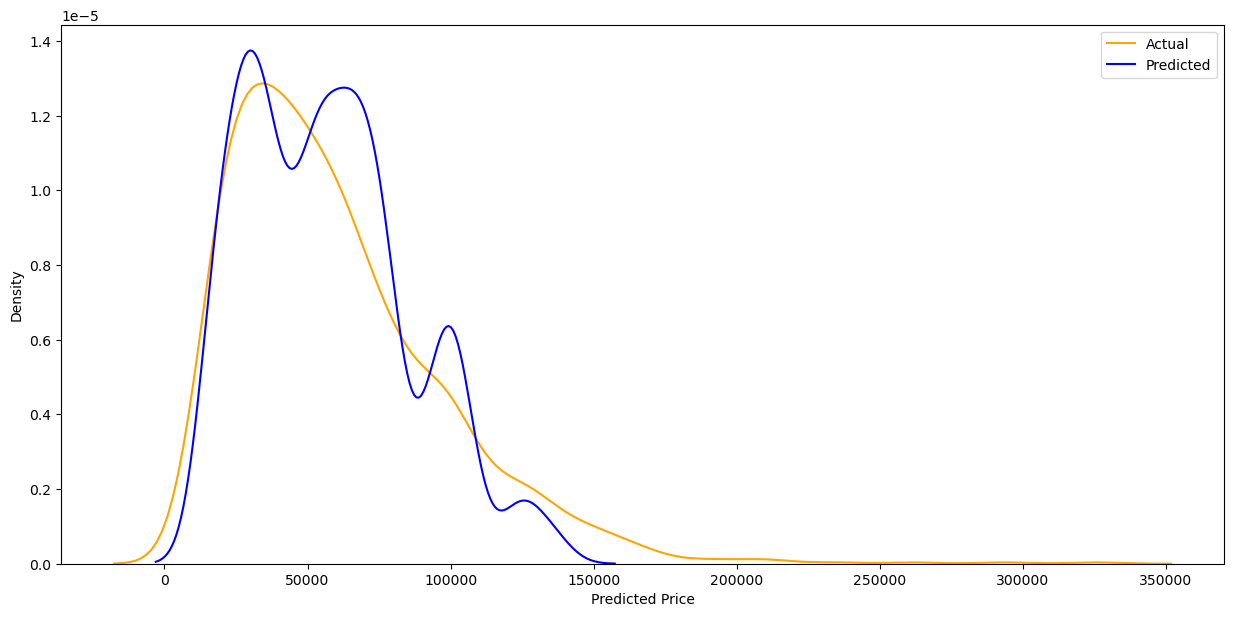

In [106]:
plt.figure(figsize=(15,7))
sns.distplot(df['Price'],hist=False,color='orange',label='Actual')
sns.distplot(df['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Random Forest Regressor
 My Version

In [107]:
rf1 = RandomForestRegressor(n_estimators=100,
                              random_state=3,
                              max_samples=0.5,
                              max_features=0.75,
                              max_depth=15)

rf1.fit(X_train,y_train)
print(f'R2 score : {metrics.r2_score(y_test,rf1.predict(X_test))}')

R2 score : 0.8222558202943652


In [108]:
predicted = []
testtrain = np.array(train)
for i in range(len(testtrain)):
    predicted.append(rf1.predict([testtrain[i]]))
    
predicted

[array([11.23225211]),
 array([10.87771072]),
 array([10.68411776]),
 array([11.79765637]),
 array([11.33288596]),
 array([9.89836769]),
 array([11.42365108]),
 array([10.87771072]),
 array([11.43760659]),
 array([10.81138756]),
 array([10.11035236]),
 array([9.88504193]),
 array([11.76130636]),
 array([10.27527646]),
 array([11.18185448]),
 array([11.33288596]),
 array([10.72834807]),
 array([11.79765637]),
 array([10.34037545]),
 array([11.08386869]),
 array([10.90695866]),
 array([9.69761295]),
 array([10.85052874]),
 array([10.80088096]),
 array([10.13642418]),
 array([10.91114534]),
 array([10.67771404]),
 array([11.11402954]),
 array([10.77945803]),
 array([9.60209294]),
 array([9.72311094]),
 array([10.04711161]),
 array([11.53074138]),
 array([10.91114534]),
 array([9.63623861]),
 array([9.92043803]),
 array([10.88416518]),
 array([10.35592828]),
 array([10.76319307]),
 array([9.95437427]),
 array([11.34612531]),
 array([10.35433393]),
 array([10.53401649]),
 array([10.91716592

In [109]:
ans = [np.exp(predicted[i][0]) for i in range(len(predicted))]

In [110]:
data = df.copy()
data['Predicted Price'] = np.array(ans)
data

,Company,TypeName,Ram,Weight,Price,Touchscreen,Ips,PPI,Cpu brand,HDD,SSD,Gpu brand,os,Predicted Price
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac,75527.500218
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac,52982.170043
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux,43656.949696
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac,132940.424562
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac,83523.721220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows,36218.043262
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows,85278.081644
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows,12533.408183
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1,0,AMD,Windows,39400.083310


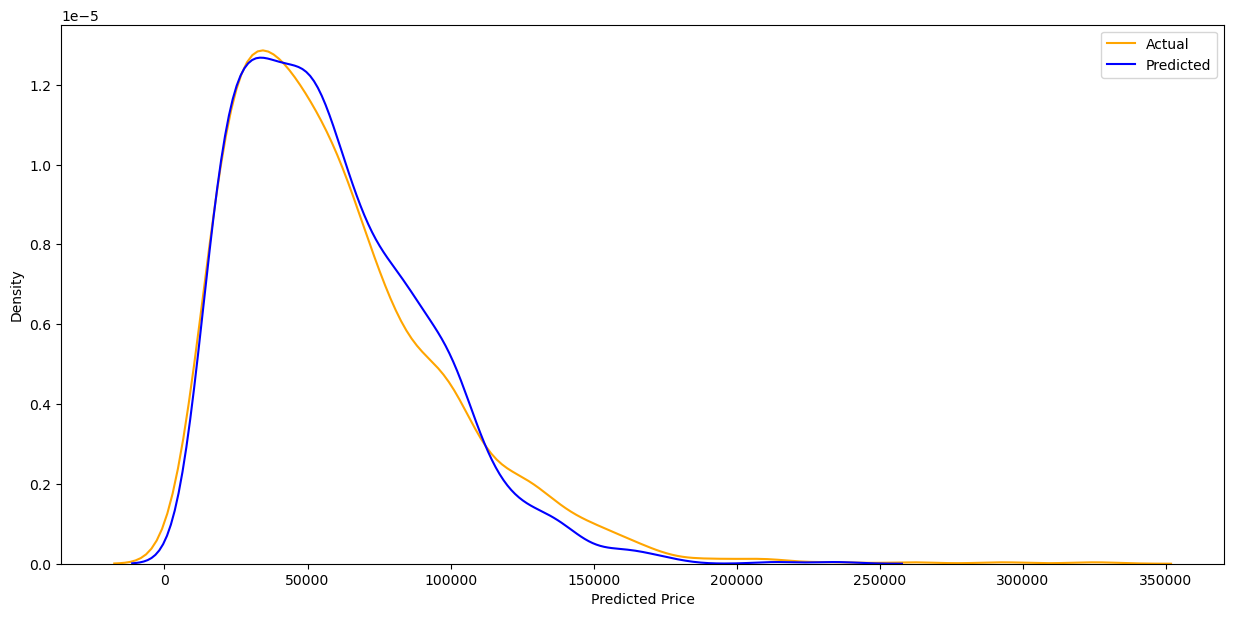

In [112]:
plt.figure(figsize=(15,7))
sns.distplot(data['Price'],hist=False,color='orange',label='Actual')
sns.distplot(data['Predicted Price'],hist=False,color='blue',label='Predicted')
plt.legend()
plt.show()

# Pickling our version of model

In [113]:
import pickle
file = open('laptoppricepredictor.pkl','wb')
pickle.dump(rf1,file)
file.close()

# Creating an app

In [ ]:
import streamlit as st
import pickle 
import joblib

# importing the model
pipe = pickle.load(open('pipe.pkl','rb'))
df = pickle.load(open('df.pkl','rb'))

st.title('Laptop Price Predictor')

# brand
company = str(st.selectbox('Brand',df['Company'].unique()))

# type of laptop
type = str(st.selectbox('Type',df['TypeName'].unique()))

# Ram
ram = st.selectbox('RAM(in GB)',[2,4,6,8,12,16,24,32,64])

# Weight
weight = st.number_input('Laptop Weight')

# Touchscreen
touchscreen = st.selectbox('Touchscreen',['No','Yes'])

# IPS
ips = st.selectbox('IPS',['No','Yes'])

# screen size
screen_size = st.number_input('Screen Size')

# resolution
resolution = st.selectbox('Screen Resolution',['1920x1080','1366x768','1600x900','3840x2160','3200x1800','2880x1800','2560x1600','2560x1440','2304x1440'])

# CPU
cpu = st.selectbox('CPU',df['Cpu brand'].unique())

# Harddrive
hdd = st.selectbox('HDD(in GB)',[0,128,256,512,1024,2048])

ssd = st.selectbox('SSD(in GB)',[0,8,128,256,512,1024])

# Gpu
gpu = st.selectbox('GPU',df['Gpu brand'].unique())

# Operating system
os = st.selectbox('OS',df['os'].unique())

if st.button('Predict Price'):
    # Load the model and make predictions
    model = joblib.load('laptoppricepredictor.pkl')
    user_input = [company, type, ram, weight, touchscreen, ips, screen_size, resolution, cpu, hdd, ssd, gpu, os]
    price = model.predict(user_input)[0]
    st.write(f"Estimated Price: {price:.2f}")

# Questions to Explore:

1. Which features have the most significant impact on laptop prices?

In [ ]:
Answer:- Features like processor type, RAM size, storage capacity, GPU type, screen size, 
and brand generally have a significant impact on laptop prices. 
For example, laptops with high-performance CPUs and GPUs, larger RAM, and high-resolution screens tend to be more expensive.
Feature importance analysis using models like Random Forest can provide precise insights into which features are most influential.

2. Can the model accurately predict the prices of laptops from lesser-known brands?

In [ ]:
Answer:- Models can struggle with lesser-known brands if the training data is biased towards popular brands. 
Performance may be lower for these brands due to less representative training data. 
Improving accuracy for lesser-known brands may involve augmenting the dataset with more examples 
from these brands or using techniques to handle class imbalance.

3.Does the brand of the laptop significantly influence its price?

In [ ]:
Answer:- Yes, the brand can significantly influence laptop prices. 
Premium brands like Apple or Dell often command higher prices due to perceived quality, 
brand value, and marketing. Including brand as a feature in the model 
and analyzing its impact can confirm its significance in price determination.

4.How well does the model perform on laptops with high-end specifications compared to budget laptops?

In [ ]:
Answer:- Models typically perform better on high-end specifications due to the larger price variance 
and more distinct feature differences. For budget laptops, the predictions might be less accurate 
due to less variance in price and more subtle feature differences. 
Evaluating performance metrics like MAE or RMSE across different segments can highlight these differences.

5.What are the limitations and challenges in predicting laptop prices accurately?

In [ ]:
Answer:- Limitations include-
1. Data Quality 
2. Feature Selection
3. Market Trends
4. Overfitting
5. External Factors

6.How does the model perform when predicting the prices of newly released laptops not present in the training dataset?

In [ ]:
Answer: Models often struggle with newly released laptops if they were not part of the training data.
The performance on such laptops can be unpredictable, and predictions may be less accurate. 
Incorporating a mechanism to update the model with new data or using transfer learning techniques 
can help improve performance on new and unseen laptops.

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1272 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1272 non-null   object 
 1   TypeName     1272 non-null   object 
 2   Ram          1272 non-null   int32  
 3   Weight       1272 non-null   float64
 4   Price        1272 non-null   float64
 5   Touchscreen  1272 non-null   int64  
 6   Ips          1272 non-null   int64  
 7   PPI          1272 non-null   float64
 8   Cpu brand    1272 non-null   object 
 9   HDD          1272 non-null   int64  
 10  SSD          1272 non-null   int64  
 11  Gpu brand    1272 non-null   object 
 12  os           1272 non-null   object 
dtypes: float64(3), int32(1), int64(4), object(5)
memory usage: 134.2+ KB
